In [1]:
import urllib.request
from io import StringIO
import json
import base64
import gzip
import requests
# url = "https://api.wegmans.io/meals/recipes?api-version=2018-10-18"
url = "https://api.wegmans.io/meals/recipes/21472?api-version=2018-10-18"
headers = {'Subscription-Key': '34255a41752c44f2bbb03b16445ce49c'}
#request = urllib.request.Request(url, headers=headers)

#with urllib.request.urlopen(request) as response:
  #  data = response.read()
json_data = requests.get(url, headers=headers).json()
print(type(json_data))
#json_page = json.load(data)
print(json_data)
# for i in range (0, len (json_page['results'])):
#     print (json_page['results'][i]['id'])

<class 'dict'>
{'id': 21472, 'type': 'recipe', 'name': 'Beef Fajitas', 'wellnessKeys': ['Fruits/Vegetables'], 'servings': {'produces': None, 'min': 6.0, 'max': 0.0}, 'preparationTime': {'min': 25.0, 'max': 0.0}, 'cookingTime': {'min': 25.0, 'max': 0.0}, 'promotions': {'seasons': ['Fall', 'Winter'], 'years': ['2017', '2018', '2019']}, 'nutrition': {'servingSize': '2 fajitas; about 8 oz', 'information': 'Each serving (2 fajitas; about 8 oz) contains 450 calories, 61 g carbohydrate, (1 g fiber), 25 g protein, 14 g fat,  (3 g saturated fat), 40 mg cholesterol, and 840 mg sodium.', 'sodium': 840, 'carbohydrates': 61, 'cholesterol': 40, 'saturatedFat': 3, 'fat': 14, 'calories': 450, 'protein': 25}, 'ingredients': [{'group': 'Main', 'type': 'product', 'name': 'Wegmans Pure Olive Oil', 'quantity': {'value': '2', 'unitOfMeasure': 'Tbsp', 'extendedUnits': None, 'text': '2 Tbsp'}, 'displayOrder': 1, 'sku': 38385, 'skuQuantity': 1, '_links': [{'href': '/products/38385?api-version=2018-10-18', 'rel

In [6]:
import urllib.request
import csv
import requests
import json 
import pandas as pd 
import csv
from pandas.io.json import json_normalize #package for flattening json in pandas df

url = "https://api.wegmans.io/meals/recipes/search?query=*&api-version=2018-10-18"
headers = {'Subscription-Key': '34255a41752c44f2bbb03b16445ce49c'}
request = urllib.request.Request(url, headers=headers)
with urllib.request.urlopen(request) as response:
    the_page = response.read()
    the_page=json.loads(the_page)
list_of_id = []

for i in range (0, len (the_page['results'])):
    list_of_id.append(the_page['results'][i]['id'])
list_of_id = list(map(int, list_of_id))
list_len = len(list_of_id)
print(list_of_id)
print(list_len)

headers = {'Subscription-Key': '34255a41752c44f2bbb03b16445ce49c'}
list_of_urls = []

#csvFile = open('out.csv', 'a')
#csvWriter = csv.writer(csvFile, lineterminator='\n')
#print(type(data))
for i in list_of_id:
    data = []
    url = "https://api.wegmans.io/meals/recipes/%s?api-version=2018-10-18&Subscription-Key=34255a41752c44f2bbb03b16445ce49c"%i
    #print(url)
    list_of_urls.append(url)
    json_data = requests.get(url).json()

#     data['recipe_id'] = json_data['id']
#     data['name'] = json_data['name']
#     data['sodium'] = json_data['nutrition']['sodium']
#     data['carbohydrates'] = json_data['nutrition']['carbohydrates']
#     data['cholesterol'] = json_data['nutrition']['cholesterol']
#     data['saturatedFat'] = json_data['nutrition']['saturatedFat']
#     data['fat'] = json_data['nutrition']['fat']
#     data['calories'] = json_data['nutrition']['calories']
#     data['protein'] = json_data['nutrition']['protein']
    data.append(json_data['id'])
    data.append(json_data['name'])
    data.append(json_data['nutrition']['sodium'])
    data.append(json_data['nutrition']['carbohydrates'])
    data.append(json_data['nutrition']['cholesterol'])
    data.append(json_data['nutrition']['saturatedFat'])
    data.append(json_data['nutrition']['fat'])
    data.append(json_data['nutrition']['calories'])
    data.append(json_data['nutrition']['protein'])
    print(data)
    csv_columns = ['id','Name','sodium', 'carbohydrates', 'cholesterol', 'saturatedFat', 'fat', 'calories', 'protein']
    with open('C:/Users/tceve/sout.csv', 'a', newline='\n') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(data)
#     df.to_csv("C:/Users/Karthik/out.csv", index=False)
#     data.append(recipe_id)
#     data.append(name)
#     data.append(nutrition) 
    

#     csvWriter.writerow(data)
    
#     flat = flatten_json(data)
#     #json_normalize(flat)
#     nycphil = json_normalize(data)
#     nycphil.to_csv('C:/Users/Karthik/out.csv', index = True, header = True)
#csvFile.close()


[21407, 21472, 22372, 22471, 21586, 21585, 21598, 21361, 22123, 21548, 22350, 22379, 22380, 22720, 22355, 22375, 21448, 21542, 21466, 22378, 22376, 22362, 21558, 21626, 21539, 22351, 22352, 21021, 22381, 17311, 22544, 21599, 21604, 21394, 22264, 21606, 22512, 16789, 22377, 22358, 22361, 22451, 11126, 22576, 22575, 22546, 22539, 22535, 22537, 22541, 22540, 22573, 22547, 22536, 22543, 22571, 22572, 22574, 22534, 22538, 22545, 16632, 20579, 21611, 22511, 22210, 22247, 21238, 22373, 21571, 22353, 21331, 22453, 7382, 1386, 21478, 22533, 22532, 20724, 22553, 22531, 22552, 22551, 19549, 17305, 15385, 17308, 17369, 19052, 20776, 4476, 20818, 17299, 4474, 19051, 9771, 21359, 19894, 20815, 14847]
100
[21407, 'Asian Cauliflower "Rice" Lettuce Wraps', 760, 38, 0, 3, 15, 320, 9]
[21472, 'Beef Fajitas', 840, 61, 40, 3, 14, 450, 25]
[22372, 'Black Pepper Beef', 1190, 18, 60, 5, 15, 310, 22]
[22471, 'Black Pepper Salmon', 610, 21, 110, 5, 27, 520, 43]
[21586, 'Breakfast Enchiladas', 1070, 33, 235, 9, 

In [5]:
def flatten_json(y):
        out = {}

        def flatten(x, name=''):
            if type(x) is dict:
                for a in x:
                    flatten(x[a], name + a + '_')
            elif type(x) is list:
                i = 0
                for a in x:
                    flatten(a, name + str(i) + '_')
                    i += 1
            else:
                out[name[:-1]] = x

        flatten(y)
        return out

In [7]:
print (data)

[14847, 'Cod Al Forno with Roasted Tomatoes', 280, 15, 55, 2, 20, 310, 22]


In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

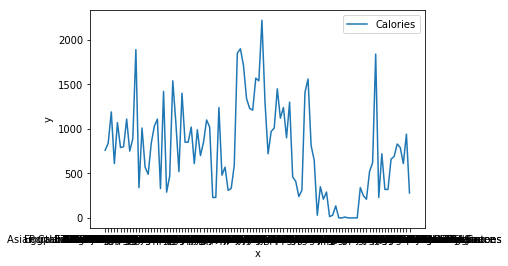

In [19]:
x = []
y = []

with open('C:/Users/tceve/sout.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append((row[1]))
        y.append(int(row[2]))

plt.plot(x,y, label='Calories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

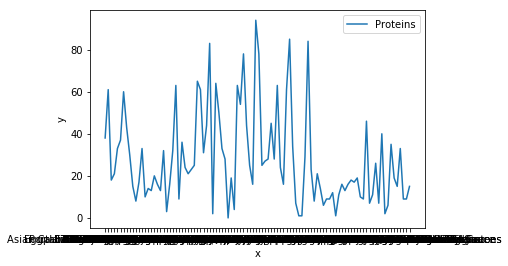

In [21]:
x = []
z = []

with open('C:/Users/tceve/sout.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append((row[1]))
        z.append(int(row[3]))

plt.plot(x,z, label='Proteins')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

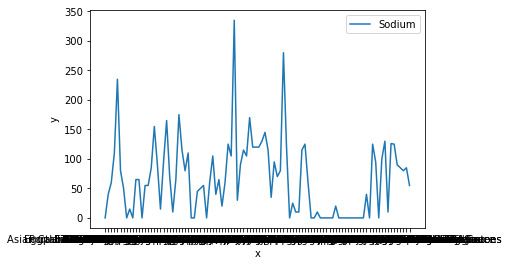

In [24]:
x = []
z = []

with open('C:/Users/tceve/sout.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append((row[1]))
        z.append(int(row[4]))

plt.plot(x,z, label='Sodium')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()